In [1]:
import numpy as np

from scipy.optimize import minimize, NonlinearConstraint
from resources.codes_nl import Plot_Package


# Postal Package

A postal package is a box with dimensions x, y, and z, which must meet the following requirements to be accepted at the post office. The sum of the height and the perimeter of the base cannot exceed 108 cm. The objective is to maximize the volume of the package.

**1. Maximize:**

The objective function has to maximize the total volume: <br>

$$V=x y z$$ <br> 


As scipy can only minimize, we will do: <br>

$$-V=-xyz$$ <br> 


In [2]:
# Define the objective function

def objective(x):
    return -x[0]*x[1]*x[2]  # maximize the volume of the package

# initial guess for dimensions
x0 = [21, 21, 21] #~108/5

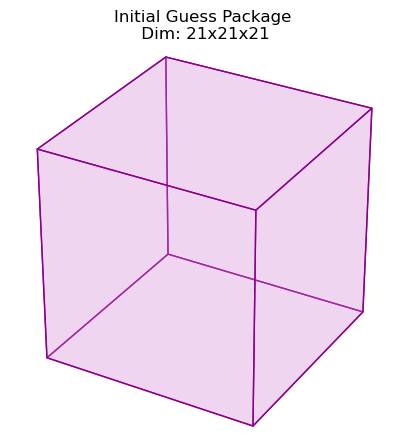

In [3]:
ax = Plot_Package(x0)
ax.set_title('Initial Guess Package\n Dim: {0}x{1}x{2}'.format(x0[0], x0[1], x0[2]));

2) **Define the constraints**

For nonlinear constraints, the inequalities need to be given as a function

Structure: $x = [x, y, z]$

In [4]:
def constraint(x):
    return 2*x[0] + 2*x[1] + x[2]  # perimeter + height constraint
const = NonlinearConstraint(constraint, -np.inf, 108)


3) **Define the bounds**

In [5]:
# define the bounds for each dimension
bnd = ((0, np.inf), (0, np.inf), (0, np.inf))


4) **Optimize**

In [6]:
problem = {'fun': objective, #objective function
           'x0': x0, #Initial guess
           'bounds': bnd,
           'constraints': [const
                          ]
          }

In [7]:
# Choose an optimization method

method = 'SLSQP'

In [8]:
result = minimize(**problem, method=method)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -11664.000078554098
       x: [ 1.800e+01  1.800e+01  3.600e+01]
     nit: 14
     jac: [-6.480e+02 -6.480e+02 -3.240e+02]
    nfev: 73
    njev: 10

In [9]:
# print the optimal solution
print("Optimal dimensions:", np.round(result.x))
print("Maximized volume:", np.round(-result.fun))

Optimal dimensions: [18. 18. 36.]
Maximized volume: 11664.0


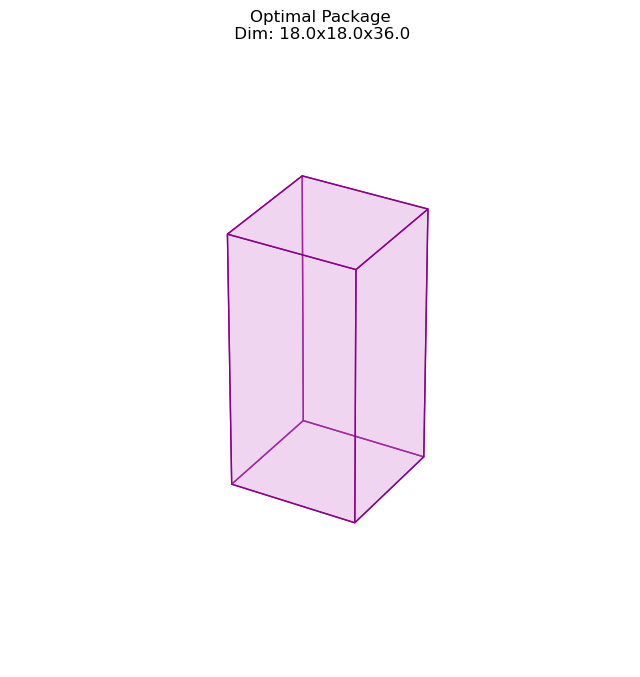

In [10]:
ax = Plot_Package(result.x, figsize = [8, 15])
ax.set_title('Optimal Package\n Dim: {0}x{1}x{2}'.format(np.round(result.x)[0], np.round(result.x)[1], np.round(result.x)[2]));